In [1]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
# Increase the font size to 16
plt.rcParams.update({'font.size': 16})

# Open and read the CSV
with open('planets.csv') as f:
    planets = f.readlines()

# Strip the newline character \n from the end of each line. Exclude lines starting with the symbol #
planets = [string.strip('\n') for string in planets if string.startswith('#') == False]

# Split each line of the file into a list (the commas separate individual list elements)
planets = [string.split(',') for string in planets]

(a) How many planets were discovered each year?

Plot the number of planets discovered per year versus time (i.e. year on x axis,
number of planets discovered on y axis).

Text(0.5, 0, 'Year')

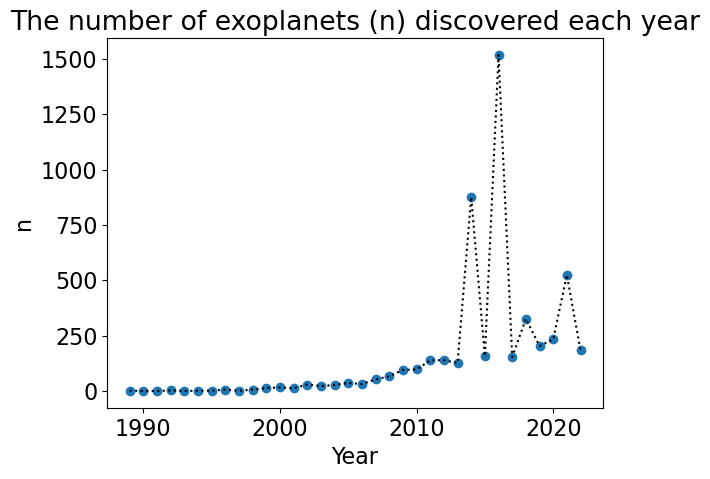

In [2]:
# Generate a list of the years
year_list = list(int(entry[2]) for entry in planets[1:])

# Account for years with no discoveries
years = np.arange(int(min(year_list)), int(max(year_list))+1, 1)

# Count the number of times each year appears
year_count = np.array([])
for i in years:
    year_count = np.append(year_count, np.count_nonzero(year_list == i))

# Plot
plt.scatter(years, year_count)
plt.plot(years, year_count, color='black', linestyle='dotted')
plt.title('The number of exoplanets (n) discovered each year')
plt.ylabel('n')
plt.xlabel('Year')

(b) How does a planet's mass correlate with the mass of its star?

Make a scatter plot on a log-log scale (i.e. logarithmic on both axes), showing each
planet's mass versus the mass of its star.

Text(0.5, 1.0, 'The masses of exoplanets against the masses of their hosts')

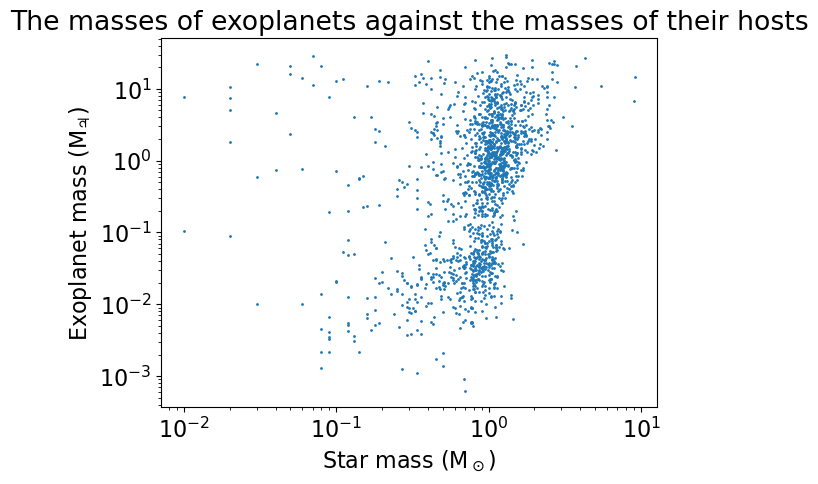

In [3]:
# Get a list of exoplanet masses and star masses and ignore entries which don't have a mass listed for one or both of the bodies
masses = [(float(entry[5]), float(entry[6])) for entry in planets[1:] if entry[5] != "" and entry[6] != ""]
masses = np.array(masses)

plt.scatter(masses[:,1], masses[:,0], s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Exoplanet mass (M$_\u2643$)')
plt.xlabel('Star mass (M$_\odot$)')
plt.title('The masses of exoplanets against the masses of their hosts')

(c) How many planets have been discovered at each facility? Which facilities have
discovered the most planets so far, and over how long a time period?

For each facility, find the total number of planets discovered and the year in which
the first planet was discovered. Print a list of the top ten facilities (in terms of how
many planets were discovered there). The list should display the facility name, the
total number of planets discovered, and the year of first discovery. Order this list
chronologically, i.e. by the year of first discovery. Which facility has found the most
planets overall?

In [19]:
# Get list of facilities and years
fac_array = np.array([(entry[3], entry[2]) for entry in planets[1:]])

# Count occurrences
fac_count = np.array(np.unique(fac_array[:,0], return_counts=True)).T
facs, planet_count = fac_count[:,0], np.array([fac_count[:,1]])
inds = np.argsort(facs)

# Sort by year
inds_year = np.argsort(fac_array[:,1].astype(int))
fac_sorted_years = np.array(fac_array)[inds_year]

# Loop over each facility to find year of each discovery
first_discovery = np.empty_like(fac_count)
pos = 0
for i in facs:
    # Find the first occurrence of each facility and get the year
    for j in range(len(fac_array)):
        if i == fac_sorted_years[:,0][j]:
            first_discovery[pos] = [fac_sorted_years[:,0][j], int(fac_sorted_years[:,1][j])]
            break
        j+=1
    pos += 1
    
# Sort by facility - as other array sorted by facility
inds_fac = np.argsort(first_discovery[:,0])
first_discovery = np.array(first_discovery)[inds_fac]

# Insert the number of planets discovered at each facility
fac_planets_first = np.insert(first_discovery, 1, planet_count, axis=1)

# Sort by number of planets discovered
inds_no = np.argsort(fac_planets_first[:,1].astype(int))
fac_planets_first = np.flip(np.array(fac_planets_first)[inds_no], axis=0)

# Get top 10
top_ten = fac_planets_first[:10]

# Sort top 10 by year 
inds_year = np.argsort(top_ten[:,2].astype(int))
top_ten = np.array(top_ten)[inds_year]

print('%-50s %-30s %-10s' %('Facility', 'Number of planets discovered', 'Year of first discovery'))
print('%-50s %-30s %-10s' %('-', '-', '-'))
for entry in top_ten:
    print('%-50s %-30s %-10s' %tuple(entry))

Facility                                           Number of planets discovered   Year of first discovery
-                                                  -                              -         
Multiple Observatories                             191                            1996      
W. M. Keck Observatory                             184                            1998      
La Silla Observatory                               270                            1999      
OGLE                                               81                             2002      
HATNet                                             67                             2006      
SuperWASP                                          113                            2007      
Kepler                                             2708                           2009      
HATSouth                                           73                             2012      
K2                                                 537   